In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
df1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

# Ques 1 - win ?

In [9]:
main_df = df1[((df1['team1'] == 'Chennai Super Kings') & (df1['team2'] == 'Mumbai Indians')) | ((df1['team1'] == 'Mumbai Indians') & (df1['team2'] == 'Chennai Super Kings'))]
main_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN
210,211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper,NaN
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
256,257,2011,Mumbai,2011-04-22,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,NaN
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
354,355,2012,Mumbai,2012-05-06,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,NaN


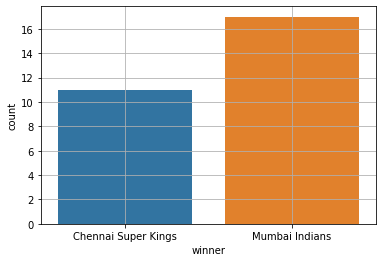

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64


In [12]:
sb.countplot(main_df['winner'])
plt.grid()
plt.show()
print(main_df['winner'].value_counts())

In [13]:
# last 3 season

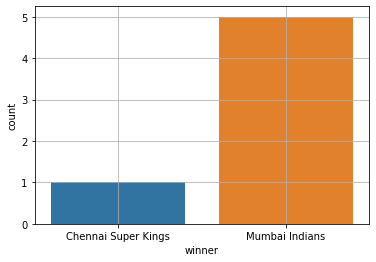

Mumbai Indians         5
Chennai Super Kings    1
Name: winner, dtype: int64


In [14]:
recent_match = main_df[main_df['season'] >= 2017]

sb.countplot(recent_match['winner'])
plt.grid()
plt.show()
print(recent_match['winner'].value_counts())

In [15]:
# winner with respect to toss decision

In [16]:
main_df.groupby(['toss_decision' , 'winner'])[['team2','team1']].count()

team2  team1
toss_decision winner                           
bat           Chennai Super Kings      6      6
              Mumbai Indians           7      7
field         Chennai Super Kings      5      5
              Mumbai Indians          10     10

In [17]:
# last 3 season
recent_match.groupby(['toss_decision' , 'winner'])[['team2','team1']].count()

team2  team1
toss_decision winner                           
bat           Mumbai Indians           2      2
field         Chennai Super Kings      1      1
              Mumbai Indians           3      3

In [18]:
# since ,last match MI just won , and CSK lost badly , and also the last face off between csk and mi - csk won , but that was the 1st match ,and many things have changed from then

# Take Aways : 
### 1 - From last 3 season - MI has won 5 times , CSK 1 time
### 2 - From all the face-off matches - MI has won 17 times , CSK - 11 times
### 3 - Last match MI lost in superover , where as CSK lost the match very badly

# Ques 1 ans - MI

In [19]:
###############################################################################################################################

# Ques 2 -Runs scored by quinton in the first 10 balls

In [21]:
main_df_mi_bat_csk_ball = df[(((df['batting_team'] == 'Mumbai Indians')  & (df['bowling_team'] == 'Chennai Super Kings')))]
main_df_mi_bat_csk_ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15613,67,2,Mumbai Indians,Chennai Super Kings,1,1,L Ronchi,ST Jayasuriya,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15614,67,2,Mumbai Indians,Chennai Super Kings,1,2,L Ronchi,ST Jayasuriya,JDP Oram,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
15615,67,2,Mumbai Indians,Chennai Super Kings,1,3,L Ronchi,ST Jayasuriya,JDP Oram,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
15616,67,2,Mumbai Indians,Chennai Super Kings,1,4,ST Jayasuriya,L Ronchi,JDP Oram,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
15617,67,2,Mumbai Indians,Chennai Super Kings,1,5,ST Jayasuriya,L Ronchi,JDP Oram,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,20,2,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178950,11415,1,Mumbai Indians,Chennai Super Kings,20,3,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178951,11415,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,1,0,1,MJ McClenaghan,run out,F du Plessis
178952,11415,1,Mumbai Indians,Chennai Super Kings,20,5,KA Pollard,JJ Bumrah,DJ Bravo,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [23]:
main_df_mi_bat_csk_ball['batsman'].unique()

array(['L Ronchi', 'ST Jayasuriya', 'RV Uthappa', 'SM Pollock',
       'DJ Bravo', 'AM Nayar', 'MA Khote', 'Harbhajan Singh', 'A Nehra',
       'SR Tendulkar', 'S Dhawan', 'JP Duminy', 'Z Khan', 'SS Tiwary',
       'R Sathish', 'KA Pollard', 'R McLaren', 'AT Rayudu', 'AN Ahmed',
       'CRD Fernando', 'SL Malinga', 'RG Sharma', 'A Symonds', 'RE Levi',
       'JEC Franklin', 'KD Karthik', 'DR Smith', 'RJ Peterson',
       'RP Singh', 'DS Kulkarni', 'RT Ponting', 'AP Tare', 'MG Johnson',
       'PP Ojha', 'R Dhawan', 'MEK Hussey', 'CJ Anderson', 'CM Gautam',
       'LMP Simmons', 'P Kumar', 'PA Patel', 'R Vinay Kumar', 'HH Pandya',
       'J Suchith', 'E Lewis', 'Ishan Kishan', 'AS Yadav', 'KH Pandya',
       'Q de Kock', 'Yuvraj Singh', 'RD Chahar', 'MJ McClenaghan'],
      dtype=object)

In [24]:
quinton = main_df_mi_bat_csk_ball[main_df_mi_bat_csk_ball['batsman'] == 'Q de Kock']
quinton

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
168182,11151,1,Mumbai Indians,Chennai Super Kings,1,1,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168183,11151,1,Mumbai Indians,Chennai Super Kings,1,2,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168184,11151,1,Mumbai Indians,Chennai Super Kings,1,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168185,11151,1,Mumbai Indians,Chennai Super Kings,1,4,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168186,11151,1,Mumbai Indians,Chennai Super Kings,1,5,Q de Kock,RG Sharma,DL Chahar,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
168195,11151,1,Mumbai Indians,Chennai Super Kings,3,2,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
168196,11151,1,Mumbai Indians,Chennai Super Kings,3,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,Q de Kock,caught,KM Jadhav
175190,11335,1,Mumbai Indians,Chennai Super Kings,1,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175191,11335,1,Mumbai Indians,Chennai Super Kings,1,4,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,3,0,3,NaN,NaN,NaN
175195,11335,1,Mumbai Indians,Chennai Super Kings,2,2,Q de Kock,RG Sharma,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [25]:
quinton.groupby('match_id')['batsman_runs'].sum()

match_id
11151     5
11335    16
11412    11
11415    30
Name: batsman_runs, dtype: int64

In [26]:
# select 1st 10 balls or less

In [64]:
match = quinton['match_id'].unique()
x,y = [],[]
for i in match:
    r = 0
    m = quinton[quinton['match_id'] == i]
    m = m.reset_index(drop = True)
    if len(m) > 10:
        m = m.head(10)
    for j in range(len(m)):
        if ((m.loc[j , 'batsman_runs'] == 4) | (m.loc[j , 'batsman_runs'] == 6)):
            r = r + m.loc[j , 'batsman_runs']
        
    x.append(r)
    y.append(i)
        

In [65]:
x

[4, 10, 8, 12]

In [66]:
y

[11151, 11335, 11412, 11415]

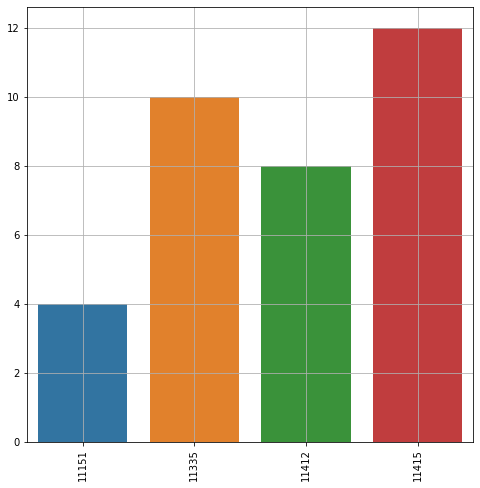

In [67]:
plt.figure(figsize = (8,8))
sb.barplot(y,x)
plt.grid()
plt.xticks(rotation = 90)
plt.show()

In [49]:
# Quinton scores avg of (4+10+8+12) / 4 = 8.5 runs with  boundaries in starting 10 balls or less

In [50]:
# lets check wrt all team

In [51]:
main_df_mi_bat_all_ball = df[(((df['batting_team'] == 'Mumbai Indians')))]
main_df_mi_bat_all_ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
248,2,1,Mumbai Indians,Rising Pune Supergiant,1,1,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
249,2,1,Mumbai Indians,Rising Pune Supergiant,1,2,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
250,2,1,Mumbai Indians,Rising Pune Supergiant,1,3,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
251,2,1,Mumbai Indians,Rising Pune Supergiant,1,4,JC Buttler,PA Patel,AB Dinda,0,...,0,0,0,0,5,0,5,NaN,NaN,NaN
252,2,1,Mumbai Indians,Rising Pune Supergiant,1,5,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,20,2,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178950,11415,1,Mumbai Indians,Chennai Super Kings,20,3,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178951,11415,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,1,0,1,MJ McClenaghan,run out,F du Plessis
178952,11415,1,Mumbai Indians,Chennai Super Kings,20,5,KA Pollard,JJ Bumrah,DJ Bravo,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [52]:
quinton_all = main_df_mi_bat_all_ball[main_df_mi_bat_all_ball['batsman'] == 'Q de Kock']
quinton_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165333,11139,2,Mumbai Indians,Delhi Capitals,1,2,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165340,11139,2,Mumbai Indians,Delhi Capitals,2,3,Q de Kock,RG Sharma,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165344,11139,2,Mumbai Indians,Delhi Capitals,3,1,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165346,11139,2,Mumbai Indians,Delhi Capitals,3,3,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
165347,11139,2,Mumbai Indians,Delhi Capitals,3,4,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178851,11415,1,Mumbai Indians,Chennai Super Kings,4,3,Q de Kock,RG Sharma,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178855,11415,1,Mumbai Indians,Chennai Super Kings,5,1,Q de Kock,RG Sharma,SN Thakur,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178857,11415,1,Mumbai Indians,Chennai Super Kings,5,3,Q de Kock,RG Sharma,SN Thakur,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178858,11415,1,Mumbai Indians,Chennai Super Kings,5,4,Q de Kock,RG Sharma,SN Thakur,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [53]:
quinton_all.groupby('match_id')['batsman_runs'].sum()

match_id
11139    29
11143    23
11145    64
11151     5
11310    19
11315    24
11318    83
11322    41
11325    36
11327    67
11335    16
11338     1
11342    75
11347    31
11412    11
11415    30
Name: batsman_runs, dtype: int64

In [69]:
# for all team
match = quinton_all['match_id'].unique()
x,y = [],[]
for i in match:
    r = 0
    m = quinton_all[quinton_all['match_id'] == i]
    m = m.reset_index(drop = True)
    if len(m) > 10:
        m = m.head(10)
    for j in range(len(m)):
        if ((m.loc[j , 'batsman_runs'] == 4) | (m.loc[j , 'batsman_runs'] == 6)):
            r = r + m.loc[j , 'batsman_runs']
        
    x.append(r)
    y.append(i)
        

In [70]:
x

[14, 4, 12, 4, 6, 8, 10, 12, 4, 0, 10, 0, 8, 6, 8, 12]

In [71]:
y

[11139,
 11143,
 11145,
 11151,
 11310,
 11315,
 11318,
 11322,
 11325,
 11327,
 11335,
 11338,
 11342,
 11347,
 11412,
 11415]

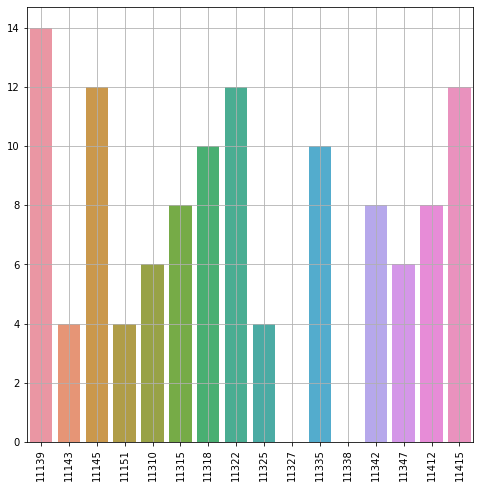

In [72]:
plt.figure(figsize = (8,8))
sb.barplot(y,x)
plt.grid()
plt.xticks(rotation = 90)
plt.show()

In [68]:
# avg runs

In [75]:
np.array(x).mean()    # avg of 7.37 runs made only using boundaries in less than or equal to 10 balls

7.375

In [77]:
#mode
stats.mode(x)

ModeResult(mode=array([4], dtype=int64), count=array([3]))

In [78]:
# for mode ans is 4 -- wrt all team

# Take Aways:
### 1 - Avg runs scored by quinton wrt csk is 8.5 runs in the starting 10 balls or less
### 2 - Avg runs scored by quinton wrt all team is 7.375 in the staring 10 balls or less
### 3 - Mode runs scored by quinton wrt all team is 4 in the staring 10 balls or less


# Ques 2 ans  - Less than 10 runs

In [80]:
############################################################################################################################

# Ques 3 - Bowler - Dot ball to total ball ratio for MI ?

In [81]:
main_df_csk_bat_mi_ball = df[(((df['bowling_team'] == 'Mumbai Indians')  & (df['batting_team'] == 'Chennai Super Kings')))]
main_df_csk_bat_mi_ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15486,67,1,Chennai Super Kings,Mumbai Indians,1,1,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
15487,67,1,Chennai Super Kings,Mumbai Indians,1,2,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15488,67,1,Chennai Super Kings,Mumbai Indians,1,3,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15489,67,1,Chennai Super Kings,Mumbai Indians,1,4,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15490,67,1,Chennai Super Kings,Mumbai Indians,1,5,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [82]:
main_df_csk_bat_mi_ball['bowler'].unique()

array(['SM Pollock', 'A Nehra', 'DS Kulkarni', 'Harbhajan Singh',
       'DJ Bravo', 'VS Yeligati', 'AM Nayar', 'MA Khote', 'RR Raje',
       'DJ Thornely', 'SL Malinga', 'Z Khan', 'ST Jayasuriya',
       'JP Duminy', 'C Nanda', 'R McLaren', 'AN Ahmed', 'KA Pollard',
       'R Sathish', 'CRD Fernando', 'MM Patel', 'RG Sharma',
       'JEC Franklin', 'PP Ojha', 'RJ Peterson', 'RP Singh', 'DR Smith',
       'MG Johnson', 'P Suyal', 'R Dhawan', 'CJ Anderson', 'P Kumar',
       'JJ Bumrah', 'J Suchith', 'R Vinay Kumar', 'MJ McClenaghan',
       'M de Lange', 'HH Pandya', 'Mustafizur Rahman', 'M Markande',
       'KH Pandya', 'BCJ Cutting', 'J Behrendorff', 'RD Chahar', 'A Roy',
       'J Yadav'], dtype=object)

In [243]:
bowler = ['RD Chahar' , 'JJ Bumrah','KH Pandya' , 'HH Pandya','KA Pollard','TA Boult']

In [91]:
# select only these bowlers

In [149]:
dot = main_df_csk_bat_mi_ball[(main_df_csk_bat_mi_ball['bowler'] == 'RD Chahar') | (main_df_csk_bat_mi_ball['bowler'] == 'JJ Bumrah') | (main_df_csk_bat_mi_ball['bowler'] == 'KH Pandya') |(main_df_csk_bat_mi_ball['bowler'] == 'HH Pandya')|(main_df_csk_bat_mi_ball['bowler'] == 'KA Pollard')|(main_df_csk_bat_mi_ball['bowler'] == 'TA Boult')]

In [150]:
dot

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
49787,211,1,Chennai Super Kings,Mumbai Indians,12,1,MS Dhoni,ML Hayden,KA Pollard,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
49788,211,1,Chennai Super Kings,Mumbai Indians,12,2,ML Hayden,MS Dhoni,KA Pollard,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
49789,211,1,Chennai Super Kings,Mumbai Indians,12,3,MS Dhoni,ML Hayden,KA Pollard,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
49790,211,1,Chennai Super Kings,Mumbai Indians,12,4,ML Hayden,MS Dhoni,KA Pollard,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
49791,211,1,Chennai Super Kings,Mumbai Indians,12,5,MS Dhoni,ML Hayden,KA Pollard,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock
179068,11415,2,Chennai Super Kings,Mumbai Indians,19,3,RA Jadeja,SR Watson,JJ Bumrah,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179069,11415,2,Chennai Super Kings,Mumbai Indians,19,4,RA Jadeja,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179070,11415,2,Chennai Super Kings,Mumbai Indians,19,5,RA Jadeja,SR Watson,JJ Bumrah,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [151]:
dot['bowler'].unique()

array(['KA Pollard', 'JJ Bumrah', 'HH Pandya', 'KH Pandya', 'RD Chahar'],
      dtype=object)

In [214]:
dot.groupby(['match_id' , 'bowler' ])['ball'].count()

match_id  bowler    
211       KA Pollard    24
234       KA Pollard    24
257       KA Pollard    27
308       KA Pollard    26
379       KA Pollard    18
386       KA Pollard    27
454       KA Pollard    18
457       KA Pollard    27
470       KA Pollard     6
490       JJ Bumrah     25
          KA Pollard    18
515       JJ Bumrah     23
          KA Pollard     8
530       KA Pollard    13
559       HH Pandya      6
573       KA Pollard    18
576       HH Pandya     25
7894      HH Pandya     27
          JJ Bumrah     25
7920      HH Pandya     24
          JJ Bumrah     25
          KH Pandya     25
11151     HH Pandya     25
          JJ Bumrah     25
          KH Pandya     14
          RD Chahar     13
11335     HH Pandya     14
          JJ Bumrah     19
          KH Pandya     18
          RD Chahar     24
11412     HH Pandya     12
          JJ Bumrah     25
          KH Pandya     24
          RD Chahar     24
11415     HH Pandya      7
          JJ Bumrah     24
       

In [103]:
match = dot['match_id'].unique()

In [104]:
match

array([  211,   234,   257,   308,   379,   386,   454,   457,   470,
         490,   515,   530,   559,   573,   576,  7894,  7920, 11151,
       11335, 11412, 11415], dtype=int64)

In [139]:
bowler

['RD Chahar', 'JJ Bumrah', 'KH Pandya', 'HH Pandya', 'KA Pollard', 'TA Boult']

In [142]:
z = dot[dot['match_id'] == 11415]

In [135]:
m = dot[dot['match_id'] == 234]
m = m.reset_index(drop = True)
print(m)
c=0
for i in range(len(m)):
    if m.loc[i , 'total_runs'] == 0:
        c=c+1

    match_id  inning         batting_team    bowling_team  over  ball  \
0        234       1  Chennai Super Kings  Mumbai Indians     9     1   
1        234       1  Chennai Super Kings  Mumbai Indians     9     2   
2        234       1  Chennai Super Kings  Mumbai Indians     9     3   
3        234       1  Chennai Super Kings  Mumbai Indians     9     4   
4        234       1  Chennai Super Kings  Mumbai Indians     9     5   
5        234       1  Chennai Super Kings  Mumbai Indians     9     6   
6        234       1  Chennai Super Kings  Mumbai Indians    11     1   
7        234       1  Chennai Super Kings  Mumbai Indians    11     2   
8        234       1  Chennai Super Kings  Mumbai Indians    11     3   
9        234       1  Chennai Super Kings  Mumbai Indians    11     4   
10       234       1  Chennai Super Kings  Mumbai Indians    11     5   
11       234       1  Chennai Super Kings  Mumbai Indians    11     6   
12       234       1  Chennai Super Kings  Mumbai I

In [136]:
c , len(m)

(3, 24)

In [155]:
3/24

0.125

In [156]:
bowler

['RD Chahar', 'JJ Bumrah', 'KH Pandya', 'HH Pandya', 'KA Pollard', 'TA Boult']

In [225]:
d,m,l = [],[],[]
bo = []
for x in bowler:
    bo.append(x)
    b = x
    s = dot[dot['bowler'] == b]
    
    match = s['match_id'].unique()
    for i in match:
        m.append(i)
        c = 0
        s = s[s['match_id'] == i]
        s = s.reset_index(drop =True)
        l.append(len(s))
        for j in range(len(s)):
            if s.loc[j,'total_runs'] == 0:
                c=c+1
        d.append(c)
    d.append("next")



In [226]:
np.array(d)

array(['5', '0', '0', '0', 'next', '7', '0', '0', '0', '0', '0', '0', '0',
       'next', '9', '0', '0', '0', '0', 'next', '2', '0', '0', '0', '0',
       '0', '0', '0', 'next', '4', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', 'next', 'next'], dtype='<U11')

In [227]:
np.array(l)

array([13,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,
        6,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])

In [228]:
bo

['RD Chahar', 'JJ Bumrah', 'KH Pandya', 'HH Pandya', 'KA Pollard', 'TA Boult']

In [235]:
rd = 5/13
bum = 7/25
pand = 9/25
hpand = 2/6
pol = 4/24
x = [rd,bum,pand,hpand,pol , 0]

In [236]:
x

[0.38461538461538464, 0.28, 0.36, 0.3333333333333333, 0.16666666666666666, 0]

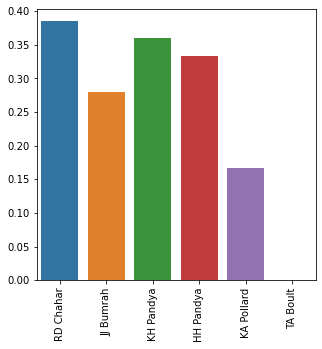

In [240]:
plt.figure(figsize = (5,5))
sb.barplot(bo , x)
plt.xticks(rotation = 90)
plt.show()

#highest dot/total is RD Chahar

In [241]:
# lets do wrt all team

In [242]:
main_df_all_bat_mi_ball = df[(((df['bowling_team'] == 'Mumbai Indians')  ))]
main_df_all_bat_mi_ball



,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
373,2,2,Rising Pune Supergiant,Mumbai Indians,1,1,AM Rahane,MA Agarwal,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
374,2,2,Rising Pune Supergiant,Mumbai Indians,1,2,MA Agarwal,AM Rahane,TG Southee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
375,2,2,Rising Pune Supergiant,Mumbai Indians,1,3,MA Agarwal,AM Rahane,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
376,2,2,Rising Pune Supergiant,Mumbai Indians,1,4,MA Agarwal,AM Rahane,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
377,2,2,Rising Pune Supergiant,Mumbai Indians,1,5,AM Rahane,MA Agarwal,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [244]:
dot = main_df_all_bat_mi_ball[(main_df_all_bat_mi_ball['bowler'] == 'RD Chahar') | (main_df_all_bat_mi_ball['bowler'] == 'JJ Bumrah') | (main_df_all_bat_mi_ball['bowler'] == 'KH Pandya') |(main_df_all_bat_mi_ball['bowler'] == 'HH Pandya')|(main_df_all_bat_mi_ball['bowler'] == 'KA Pollard')|(main_df_all_bat_mi_ball['bowler'] == 'TA Boult')]

In [245]:
dot.groupby(['match_id' , 'bowler' ])['ball'].count()

match_id  bowler    
2         HH Pandya     24
          JJ Bumrah     24
          KA Pollard    12
          KH Pandya     12
7         JJ Bumrah     26
                        ..
11412     RD Chahar     24
11415     HH Pandya      7
          JJ Bumrah     24
          KH Pandya     18
          RD Chahar     24
Name: ball, Length: 284, dtype: int64

In [246]:
d,m,l = [],[],[]
bo = []
for x in bowler:
    bo.append(x)
    b = x
    s = dot[dot['bowler'] == b]
    
    match = s['match_id'].unique()
    for i in match:
        m.append(i)
        c = 0
        s = s[s['match_id'] == i]
        s = s.reset_index(drop =True)
        l.append(len(s))
        for j in range(len(s)):
            if s.loc[j,'total_runs'] == 0:
                c=c+1
        d.append(c)
    d.append("next")



In [247]:
np.array(d)
[5,6,2,4,0]

array(['5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       'next', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       'next', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', 'next', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [249]:
np.array(l)
[13,24,12,24,12]

array([13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [250]:
bo

['RD Chahar', 'JJ Bumrah', 'KH Pandya', 'HH Pandya', 'KA Pollard', 'TA Boult']

In [251]:
rd = 5/13
bum = 6/24
pand = 2/12
hpand = 4/24
pol = 0/12
x = [rd,bum,pand,hpand,pol , 0]

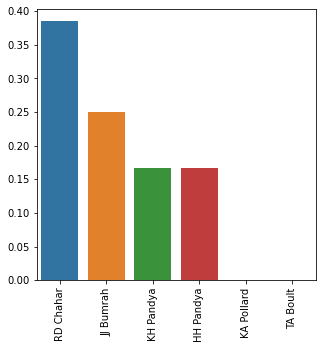

In [252]:
plt.figure(figsize = (5,5))
sb.barplot(bo , x)
plt.xticks(rotation = 90)
plt.show()

#highest dot/total is RD Chahar

In [253]:
# RD chahar has the highest dot to total balls againt all team
# Yet , Bumrah will score good today

# Ques 3 ans  - JJ Bumrah

In [254]:
############################################################################################################################

# Ques 4 - Over where both 6 and 4 is given

In [256]:
main_df_csk_bat_mi_ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15486,67,1,Chennai Super Kings,Mumbai Indians,1,1,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
15487,67,1,Chennai Super Kings,Mumbai Indians,1,2,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15488,67,1,Chennai Super Kings,Mumbai Indians,1,3,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15489,67,1,Chennai Super Kings,Mumbai Indians,1,4,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15490,67,1,Chennai Super Kings,Mumbai Indians,1,5,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [257]:
match = main_df_csk_bat_mi_ball['match_id'].unique()
match

array([   67,    96,   118,   162,   194,   211,   234,   257,   308,
         355,   379,   386,   430,   454,   457,   470,   490,   515,
         530,   559,   573,   576,  7894,  7920, 11151, 11335, 11412,
       11415], dtype=int64)

In [259]:
x = main_df_csk_bat_mi_ball[main_df_csk_bat_mi_ball['match_id'] == 67]

In [261]:

o = x[x['over'] == 1]
o = o.reset_index(drop = True)


In [262]:
o

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,67,1,Chennai Super Kings,Mumbai Indians,1,1,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1,67,1,Chennai Super Kings,Mumbai Indians,1,2,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,67,1,Chennai Super Kings,Mumbai Indians,1,3,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,67,1,Chennai Super Kings,Mumbai Indians,1,4,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,67,1,Chennai Super Kings,Mumbai Indians,1,5,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
5,67,1,Chennai Super Kings,Mumbai Indians,1,6,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,67,1,Chennai Super Kings,Mumbai Indians,1,7,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [268]:
q=0
over , c = [],[]
for i in match:
    x = main_df_csk_bat_mi_ball[main_df_csk_bat_mi_ball['match_id'] == i]
    x = x.reset_index(drop  =True)
    for j in range(1,7):
        over.append(j)
        o = x[x['over'] == j]
        o = o.reset_index(drop =True)
        q = 0
        for k in range(len(o)):
            if (o.loc[k , 'batsman_runs'] == 6) & (o.loc[k , 'batsman_runs'] == 4):
                q = q+1
        c.append(k)

In [271]:
over , len(over)

([1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6,
  1,
  2,
  3,
  4,
  5,
  6],
 168)

In [272]:
c , len(c)

([6,
  5,
  5,
  5,
  5,
  7,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  5,
  5,
  6,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  5,
  5,
  5,
  5,
  6,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  5,
  5,
  5,
  6,
  6,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  5,
  5,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  5,
  7,
  6,
  5,
  5,
  6,
  5,
  5,
  5,
  5,
  5,
  7,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6],
 168)

In [273]:
stats.mode(c)

ModeResult(mode=array([5]), count=array([132]))

In [274]:
# since , mode is 5 = these many overs have either one six and one four

In [275]:
# lets do wrt all team

In [277]:
q=0
over , c = [],[]
for i in match:
    x = main_df_mi_bat_csk_ball[main_df_mi_bat_csk_ball['match_id'] == i]
    x = x.reset_index(drop  =True)
    for j in range(1,7):
        over.append(j)
        o = x[x['over'] == j]
        o = o.reset_index(drop =True)
        q = 0
        for k in range(len(o)):
            if (o.loc[k , 'batsman_runs'] == 6) & (o.loc[k , 'batsman_runs'] == 4):
                q = q+1
        c.append(k)

In [278]:
over

[1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6]

In [279]:
c

[7,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 7,
 5,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 6,
 7,
 5,
 7,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 6,
 5]

In [280]:
stats.mode(c)

ModeResult(mode=array([5]), count=array([129]))

# Ques 4 ans - (5-6)

In [282]:
######################################################################################################################

# Ques 5 - Bowler Lethality score

In [283]:
main_df_csk_bat_mi_ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15486,67,1,Chennai Super Kings,Mumbai Indians,1,1,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
15487,67,1,Chennai Super Kings,Mumbai Indians,1,2,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15488,67,1,Chennai Super Kings,Mumbai Indians,1,3,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15489,67,1,Chennai Super Kings,Mumbai Indians,1,4,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15490,67,1,Chennai Super Kings,Mumbai Indians,1,5,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [287]:
x = pd.DataFrame(main_df_csk_bat_mi_ball.groupby(['match_id' , 'bowler'])['player_dismissed'].count())

In [291]:
x

player_dismissed
match_id bowler                           
67       A Nehra                         2
         AM Nayar                        0
         DJ Bravo                        0
         DS Kulkarni                     1
         Harbhajan Singh                 0
...                                    ...
11415    JJ Bumrah                       2
         KH Pandya                       1
         MJ McClenaghan                  0
         RD Chahar                       1
         SL Malinga                      2

[168 rows x 1 columns]

In [293]:
player_dis = pd.DataFrame(x.to_records())

In [294]:
player_dis

,match_id,bowler,player_dismissed
0,67,A Nehra,2
1,67,AM Nayar,0
2,67,DJ Bravo,0
3,67,DS Kulkarni,1
4,67,Harbhajan Singh,0
...,...,...,...
163,11415,JJ Bumrah,2
164,11415,KH Pandya,1
165,11415,MJ McClenaghan,0
166,11415,RD Chahar,1


In [305]:
dots = main_df_csk_bat_mi_ball[main_df_csk_bat_mi_ball['total_runs'] == 0]
dots

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15487,67,1,Chennai Super Kings,Mumbai Indians,1,2,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15488,67,1,Chennai Super Kings,Mumbai Indians,1,3,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15489,67,1,Chennai Super Kings,Mumbai Indians,1,4,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15491,67,1,Chennai Super Kings,Mumbai Indians,1,6,PA Patel,ML Hayden,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15493,67,1,Chennai Super Kings,Mumbai Indians,2,1,ML Hayden,PA Patel,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179057,11415,2,Chennai Super Kings,Mumbai Indians,17,4,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179064,11415,2,Chennai Super Kings,Mumbai Indians,18,5,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock
179069,11415,2,Chennai Super Kings,Mumbai Indians,19,4,RA Jadeja,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [306]:
dots = dots.groupby(['match_id' , 'bowler'])['total_runs'].count()
dots = pd.DataFrame(dots)
dots

total_runs
match_id bowler                     
67       A Nehra                  12
         AM Nayar                  2
         DJ Bravo                  3
         DS Kulkarni               7
         Harbhajan Singh           2
...                              ...
11415    JJ Bumrah                11
         KH Pandya                 8
         MJ McClenaghan           12
         RD Chahar                13
         SL Malinga                7

[164 rows x 1 columns]

In [307]:
dots = pd.DataFrame(dots.to_records())

In [308]:
dots

,match_id,bowler,total_runs
0,67,A Nehra,12
1,67,AM Nayar,2
2,67,DJ Bravo,3
3,67,DS Kulkarni,7
4,67,Harbhajan Singh,2
...,...,...,...
159,11415,JJ Bumrah,11
160,11415,KH Pandya,8
161,11415,MJ McClenaghan,12
162,11415,RD Chahar,13


In [319]:
dots = dots.rename(columns={"total_runs": "total_dot_ball"})

In [320]:
dots

,match_id,bowler,total_dot_ball
0,67,A Nehra,12
1,67,AM Nayar,2
2,67,DJ Bravo,3
3,67,DS Kulkarni,7
4,67,Harbhajan Singh,2
...,...,...,...
159,11415,JJ Bumrah,11
160,11415,KH Pandya,8
161,11415,MJ McClenaghan,12
162,11415,RD Chahar,13


In [323]:
combine = pd.merge(player_dis , on = 'match_id' , right = dots , how='inner')

In [324]:
combine

,match_id,bowler_x,player_dismissed,bowler_y,total_dot_ball
0,67,A Nehra,2,A Nehra,12
1,67,A Nehra,2,AM Nayar,2
2,67,A Nehra,2,DJ Bravo,3
3,67,A Nehra,2,DS Kulkarni,7
4,67,A Nehra,2,Harbhajan Singh,2
...,...,...,...,...,...
991,11415,SL Malinga,2,JJ Bumrah,11
992,11415,SL Malinga,2,KH Pandya,8
993,11415,SL Malinga,2,MJ McClenaghan,12
994,11415,SL Malinga,2,RD Chahar,13


# after applying the formula , the ans i am getting is Jasprit Bumrah or Krunal Pandya

# Ques 5 ans - Jasprit Bumrah or Krunal Pandya